1. Creating a dataframe or tibble representing this dataset that has the desired properties.

In [17]:
import numpy as np
import pandas as pd
import random
import scipy.stats as sps
import matplotlib.pyplot as plt

random.seed(45)  


Generate an identification (ID) feature for a dataset comprising 800 samples, followed by the random shuffling of the data points.

In [18]:
n_samples=800
id_feature=list("ID"+str(i+100) for i in range(1,n_samples+1))
random.shuffle(id_feature)

Creating Groups A, B and C and shuffling them

In [19]:
groups = np.repeat(['A', 'B', 'C'], repeats=[267, 267, 266])
random.shuffle(groups)

Generating Feature_1 by randomly sampling from a normal distribution with a mean of 2500 and a standard deviation of 300.

In [20]:
mean = 2500
std = (2800-2200)/2
feature_1 = sps.norm.rvs(mean, std, size=n_samples)
feature_1.mean()

2486.411405629941

Generate Feature_2 by randomly sampling from a normal distribution with a mean of 400 and a standard deviation of 15.

In [21]:
mean = 400
std = 15
feature_2 = sps.norm.rvs(mean, std, size=n_samples)
feature_2.mean()

399.899838124157

Creating a DataFrame with the ID, Group, Feature_1, Feature_2 

In [22]:
fake_data = pd.DataFrame({"ID":id_feature,"Group":groups,"Feature_1":feature_1,"Feature_2":feature_2})
fake_data['Group'].value_counts()

B    267
A    267
C    266
Name: Group, dtype: int64

Creating Feature_3 using Group Feature_1 and Feature_2.

In [23]:
fake_data['Feature_3'] = np.nan

fake_data.loc[fake_data['Group'] == 'A', 'Feature_3'] = 3 * fake_data['Feature_1'] - 5 * fake_data['Feature_2']
fake_data.loc[fake_data['Group'] == 'B', 'Feature_3'] = 2 * fake_data['Feature_1']
fake_data.loc[fake_data['Group'] == 'C', 'Feature_3'] = - fake_data['Feature_1'] + fake_data['Feature_2']



Adding Component which is sampled from a normal distribution wiht mean 0 and standard seviation 12. 

In [30]:
mean = 0
std = 12
additional_component = sps.norm.rvs(mean, std, size=n_samples)
fake_data['Feature_3'] += additional_component


In [25]:
fake_data.head()

,ID,Group,Feature_1,Feature_2,Feature_3
0,ID763,C,2125.539879,386.388234,-1726.247962
1,ID204,C,2902.322078,407.393768,-2507.771190
2,ID734,C,2201.851232,404.098658,-1794.753679
3,ID422,B,2795.258253,400.445827,5591.346452
4,ID559,C,2379.127141,408.907030,-1974.322390


2a) Samples greater than 3000 based on theoretical distribution

In [32]:
from scipy.stats import norm

mean = 2500
std_dev = 300


z_score = (3000 - mean) / std_dev
proportion_above_3000 = 1 - norm.cdf(z_score)
expected_samples_above_3000 = round( n_samples * proportion_above_3000)

print("Theoretical number of samples greater than 3000:", expected_samples_above_3000)


Theoretical number of samples greater than 3000: 38


Actual samples which are greater than 3000

In [33]:
sum(fake_data['Feature_1']>3000)

25

Mean and standard deviation of Feature_3 within each group

In [34]:
grouped_data = fake_data.groupby('Group')['Feature_3'].agg(['mean', 'std'])

print(grouped_data)

              mean         std
Group                         
A      5508.251296  918.981180
B      4971.598198  573.874042
C     -2070.651792  299.646577


3. Make a scatterplot of Feature_3 vs Feature_1.

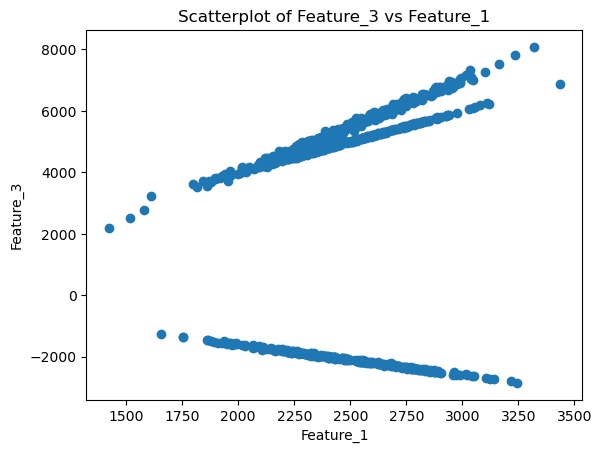

In [35]:
plt.scatter(fake_data['Feature_1'], fake_data['Feature_3'])
plt.xlabel('Feature_1')
plt.ylabel('Feature_3')
plt.title('Scatterplot of Feature_3 vs Feature_1')
plt.show()

4. Write your constructed dataframe/tibble to a csv file called fake_data.csv.

In [36]:
fake_data.to_csv('fake_data.csv', index=False)